In [2]:
import numpy as np                      
import matplotlib.pyplot as plt 
import glob 


In [45]:
class SolarAnalyzer:
    def __init__(self, failas, skirtukas=';'):
        self.failas = failas
        self.skirtukas = skirtukas  # Priskiriamas skirtukas kaip klasės atributas
        
        self.UV = []
        self.IA = []
        self.J = []
        self.P = []
        
        self.J_verte = None
        self.U_verte = None

    def read_file(self):
        with open(self.failas, 'r', encoding='utf-8') as file:
            next(file)  # Praleidžiama pirmoji eilutė
            for line in file:
                data = line.strip().split(self.skirtukas)  # Naudojamas skirtukas iš klasės atributo
                self.UV.append(float(data[0]))
                self.IA.append(float(data[1]))                     
                self.J.append(float(data[2]))
                self.P.append(float(data[3]))

    def get_data(self):
        return self.UV, self.IA, self.J, self.P      #dar 4 funkcijos/metodai 
    
    def failo_pavadinimas(self):
        return self.failas[:5]
    
    def pce(self):
        minimalus = min(self.P)
        return abs(minimalus)
    
    def jsc(self):
        artimiausias_nuliui = [abs(x) for x in self.UV]
        jsc_skaicius = min(artimiausias_nuliui)
        Jindeksas = artimiausias_nuliui.index(jsc_skaicius)
        J_verte = self.J[Jindeksas]
        return J_verte
    
    def Uoc(self):
        artimas_nuliui2 = [abs(x) for x in self.J]
        Uoc_skaicius = min(artimas_nuliui2)
        Uindeksas = artimas_nuliui2.index(Uoc_skaicius)
        U_verte = self.UV[Uindeksas]
        return U_verte
    
    
    def FF(self):
        pce_skaicius = self.pce()
        jsc_skaicius = self.jsc()
        Uoc_skaicius = self.Uoc()
        
        FFrezultatas = pce_skaicius/(jsc_skaicius * Uoc_skaicius)
        return FFrezultatas
                           

# Naudojimas
analyzer = SolarAnalyzer("V1145_A_1k_FW_2.03.dat", ';')  # Tinkamas skirtuko perdavimas
analyzer.read_file()
UV, IA, J, P = analyzer.get_data()

print('pce:', analyzer.pce())
print('jsc:', analyzer.jsc())
print('Uoc:', analyzer.Uoc())
print('FF:', analyzer.FF())
print('failo pav:', analyzer.failo_pavadinimas())




pce: 7.2185067
jsc: -19.3017375
Uoc: 0.8033333
FF: -0.46553805637457313
failo pav: V1145


In [7]:
#Visu failu sarasas
dat_failai = glob.glob('*.dat')
print(dat_failai)


['REF_D_1k_FW_2.08.dat', 'REF_D_2k_FW_2.05.dat', 'REF_D_3k_FW_2.03.dat', 'REF_D_4k_FW_2.05.dat', 'REF_D_5k_FW_2.05.dat', 'REF_D_5k_FW_2.07.dat', 'V1145_A_1k_FW_2.03.dat', 'V1145_A_2k_FW_2.03.dat', 'V1145_A_3k_FW_2.05.dat', 'V1145_A_4k_FW_2.07.dat', 'V1145_A_5k_FW_2.03.dat', 'V1145_A_6k_FW_2.03.dat', 'V1145_A_7k_FW_2.03.dat', 'V1145_B_1k_FW_2.03.dat', 'V1145_B_2k_FW_2.03.dat', 'V1145_B_3k_FW_2.03.dat', 'V1145_B_4k_FW_2.03.dat', 'V1145_B_5k_FW_2.03.dat', 'V1145_B_6k_FW_2.03.dat', 'V1145_B_7k_FW_2.03.dat', 'V1145_B_8k_FW_2.05.dat', 'V1177_C_1k_FW_2.05.dat', 'V1177_C_2k_FW_2.03.dat', 'V1177_C_3k_FW_2.03.dat', 'V1177_C_4k_FW_2.03.dat', 'V1178_E_1k_FW_2.03.dat', 'V1178_E_2k_FW_2.03.dat', 'V1178_E_3k_FW_2.05.dat', 'V1178_E_4k_FW_2.05.dat', 'V1178_E_5k_FW_2.05.dat', 'V1178_E_6k_FW_2.05.dat', 'V1178_E_7k_FW_2.03.dat', 'V1178_E_8k_FW_2.03.dat', 'V1179_F_1k_FW_2.08.dat', 'V1179_F_2k_FW_2.05.dat', 'V1179_F_3k_FW_2.05.dat', 'V1179_F_4k_FW_2.05.dat', 'V1179_F_5k_FW_2.07.dat', 'V1179_F_6k_FW_2.07.dat

In [69]:
#Zodynu valymas
REFU.clear()
V1145U.clear()
V1177U.clear()
V1178U.clear()
V1179U.clear()

REFJ.clear()
V1145J.clear()
V1177J.clear()
V1178J.clear()
V1179J.clear()

REFFF.clear()
V1145FF.clear()
V1177FF.clear()
V1178FF.clear()
V1179FF.clear()

REFP.clear()
V1145P.clear()
V1177P.clear()
V1178P.clear()
V1179P.clear()


In [70]:
REFU = []
V1145U = []
V1177U = []
V1178U = []
V1179U = []

REFJ = []
V1145J = []
V1177J = []
V1178J = []
V1179J = []

REFFF = []
V1145FF = []
V1177FF = []
V1178FF = []
V1179FF = []

REFP = []
V1145P = []
V1177P = []
V1178P = []
V1179P = []


# dat_failai = glob.glob('*.dat')
# print(dat_failai)

for i in dat_failai:
    
    klase = SolarAnalyzer(i, ';')
    klase.read_file()
    
    if i.startswith('REF'):
        REFU.append(klase.Uoc())
        REFJ.append(klase.jsc())
        REFP.append(klase.pce())
        REFFF.append(klase.FF())
        
    elif i.startswith('V1145'):
        V1145U.append(klase.Uoc())
        V1145J.append(klase.jsc())
        V1145P.append(klase.pce())
        V1145FF.append(klase.FF())
        
    elif i.startswith('V1177'):
        V1177U.append(klase.Uoc())
        V1177J.append(klase.jsc())
        V1177P.append(klase.pce())
        V1177FF.append(klase.FF())       
        
    elif i.startswith('V1178'):
        V1178U.append(klase.Uoc())
        V1178J.append(klase.jsc())
        V1178P.append(klase.pce())
        V1178FF.append(klase.FF())
        
    elif i.startswith('V1179'):
        V1179U.append(klase.Uoc())
        V1179J.append(klase.jsc())
        V1179P.append(klase.pce())
        V1179FF.append(klase.FF())
        

In [73]:
#Zodynu printinimas
print("REFU:", REFU)
print("V1145U:", V1145U)
print("V1177U:", V1177U)
print("V1178U:", V1178U)
print("V1179U:", V1179U)

print("REFJ:", REFJ)
print("V1145J:", V1145J)
print("V1177J:", V1177J)
print("V1178J:", V1178J)
print("V1179J:", V1179J)

print("REFFF:", REFFF)
print("V1145FF:", V1145FF)
print("V1177FF:", V1177FF)
print("V1178FF:", V1178FF)
print("V1179FF:", V1179FF)

print("REFP:", REFP)
print("V1145P:", V1145P)
print("V1177P:", V1177P)
print("V1178P:", V1178P)
print("V1179P:", V1179P)


REFU: [1.1066667, 1.0833333, 1.1066667, 1.1066667, 1.0833333, 1.1066667]
V1145U: [0.8033333, 0.8266667, 0.9433333, 0.92, 0.9433333, 0.78, 0.8033333, 0.8033333, 0.29, 0.36, 0.1966667, 0.36, 0.4066667, 0.6866667, 0.85]
V1177U: [1.0133333, 0.9433333, 1.0366667, 1.0366667]
V1178U: [0.5, 0.71, 0.8266667, 0.78, 0.6633333, 0.6866667, 0.1266667, 0.01]
V1179U: [0.6866667, 0.8266667, 0.6633333, 0.6633333, 0.8733333, 0.8733333, 0.8966667]
REFJ: [-25.9075833, -13.8147889, -13.4178667, -14.3619625, -11.333355, -14.7006375]
V1145J: [-19.3017375, -19.6389875, -20.5197125, -21.3685875, -20.59545, -21.1418625, -19.2826625, -21.8893875, -21.6366125, -22.6278, -19.2498, -20.61475, -19.0444, -23.0556625, -22.345175]
V1177J: [-21.0204, -20.7519125, -18.4347875, -17.07735]
V1178J: [-15.7351857, -18.2650143, -19.5459857, -18.0892857, -15.032, -14.5286714, -12.7791543, 5.5254829]
V1179J: [-19.9404857, -20.4088571, -17.5839857, -18.4517571, -18.5897143, -18.4025857, -17.9121]
REFFF: [-0.5227947222282707, -0.50

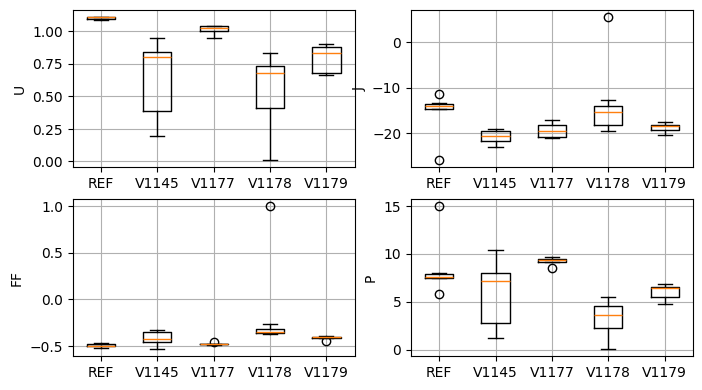

In [85]:
#Box plotas 
medziagu = ['REF', 'V1145', 'V1177', 'V1178', 'V1179' ]

fig, axis = plt.subplots(2,2, figsize=(8,4.5))

axis[0,0].boxplot([REFU, V1145U, V1177U, V1178U, V1179U])
axis[0,0].set_xticklabels(medziagu)
axis[0,0].grid()
axis[0,0].set_ylabel('U')

axis[0,1].boxplot([REFJ, V1145J, V1177J, V1178J, V1179J])
axis[0,1].set_xticklabels(medziagu)
axis[0,1].grid()
axis[0,1].set_ylabel('J')

axis[1,0].boxplot([REFFF, V1145FF, V1177FF, V1178FF, V1179FF])
axis[1,0].set_xticklabels(medziagu)
axis[1,0].grid()
axis[1,0].set_ylabel('FF')

axis[1,1].boxplot([REFP, V1145P, V1177P, V1178P, V1179P])
axis[1,1].set_xticklabels(medziagu)
axis[1,1].grid()
axis[1,1].set_ylabel('P')

plt.show()

#asiu pavadinimai 